<a href="https://www.kaggle.com/code/shenoudasafwat/vitality-360?scriptVersionId=286519369" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1-Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

 #  2-Data Generation

In [2]:
np.random.seed(42)  
n_samples = 5000

data = {
    'Physical_Activity': np.random.randint(0, 121, n_samples),
    'Nutrition_Score': np.random.uniform(0, 10, n_samples),
    'Stress_Level': np.random.randint(1, 11, n_samples),
    'Mindfulness': np.random.randint(0, 61, n_samples),
    'Sleep_Hours': np.random.uniform(3, 10, n_samples),
    'Hydration': np.random.uniform(0.5, 5.0, n_samples),
    'BMI': np.random.uniform(18, 40, n_samples),
    'Alcohol': np.random.randint(0, 21, n_samples),
    'Smoking': np.random.randint(0, 31, n_samples)
}

df = pd.DataFrame(data)

def calculate_score(row):
    score = (0.2 * row['Physical_Activity'] + 
             5 * row['Nutrition_Score'] + 
             3 * row['Sleep_Hours'] + 
             5 * row['Hydration'] + 
             2 * row['Mindfulness'] - 
             2 * row['Stress_Level'] - 
             1.5 * row['Alcohol'] - 
             1.5 * row['Smoking'] - 
             1.2 * (row['BMI'] - 22))
    return np.clip(score, 0, 100)  
df['Overall_Health_Score'] = df.apply(calculate_score, axis=1)
print(df.head())
print(df.describe())

   Physical_Activity  Nutrition_Score  Stress_Level  Mindfulness  Sleep_Hours  \
0                102         5.004011             4           33     5.995903   
1                 51         4.327291             1           13     3.855481   
2                 92         4.576996             9           53     6.018403   
3                 14         2.088827             4           54     6.037831   
4                106         3.687072             2           58     6.487482   

   Hydration        BMI  Alcohol  Smoking  Overall_Health_Score  
0   2.299589  20.085944       13        5            100.000000  
1   2.363608  30.307678       19        0             40.751727  
2   1.763663  20.481436       10        0            100.000000  
3   3.309772  21.434642       17       12            100.000000  
4   2.124497  39.607856       11        6            100.000000  
       Physical_Activity  Nutrition_Score  Stress_Level  Mindfulness  \
count        5000.000000      5000.000000   5

# 3- Exploratory Data Analysis?

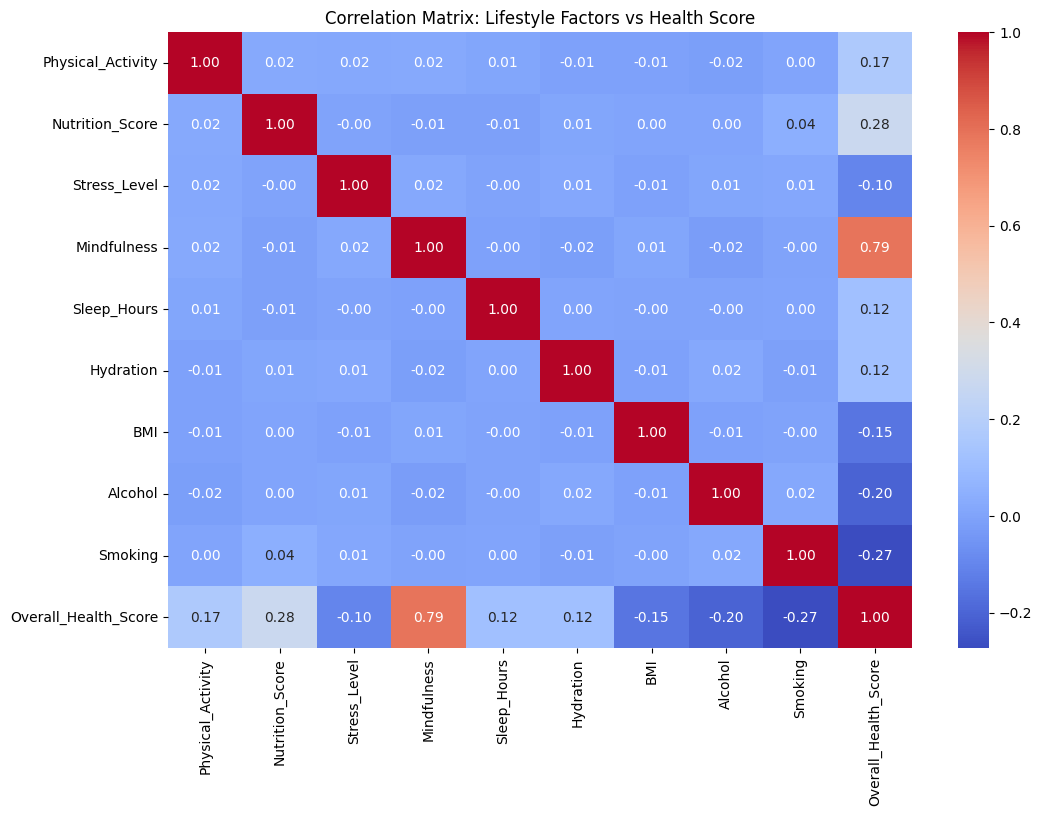

In [3]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Lifestyle Factors vs Health Score')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


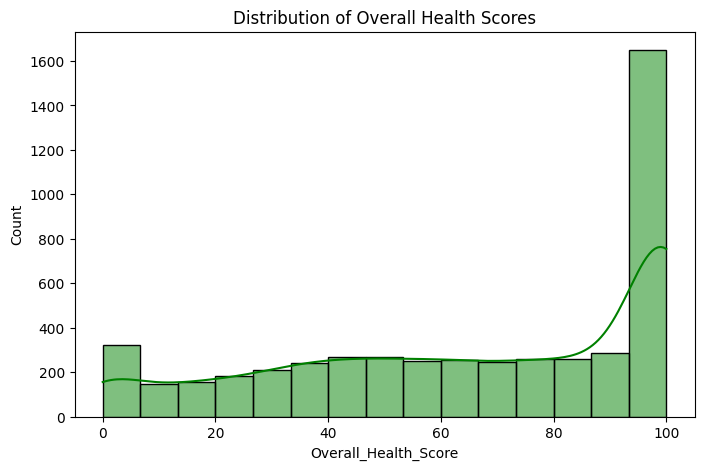

In [4]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Overall_Health_Score'], kde=True, color='green')
plt.title('Distribution of Overall Health Scores')
plt.show()

# 4-Building the Model


**1-Linear Regression: This will be very accurate because we originally created the data with a linear equation.** 


**2-Random Forest: To try a slightly stronger model and see if it can understand the relationship or not.**


In [5]:
X = df.drop('Overall_Health_Score', axis=1)
y = df['Overall_Health_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 5-Evaluation

In [6]:
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"--- {name} Performance ---")
    print(f"R2 Score: {r2:.4f} (Closer to 1.0 is better)")
    print(f"RMSE: {rmse:.4f}")
    print("\n")

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)

--- Linear Regression Performance ---
R2 Score: 0.9239 (Closer to 1.0 is better)
RMSE: 9.0432


--- Random Forest Performance ---
R2 Score: 0.9310 (Closer to 1.0 is better)
RMSE: 8.6094




# 6-Feature Importance

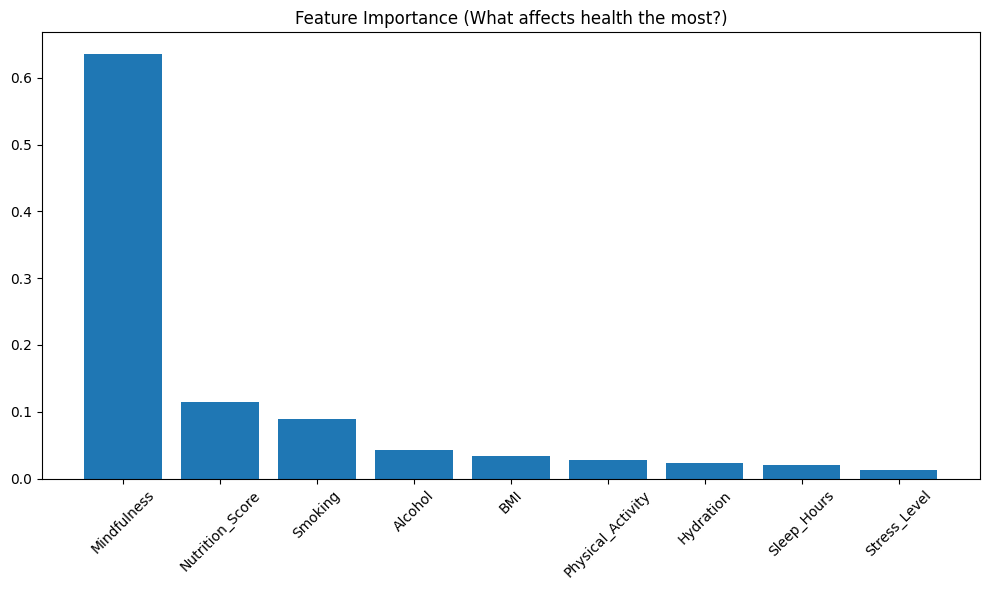

In [7]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importance (What affects health the most?)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=45)
plt.tight_layout()
plt.show()

# 7-Actual vs. Predicted Plot

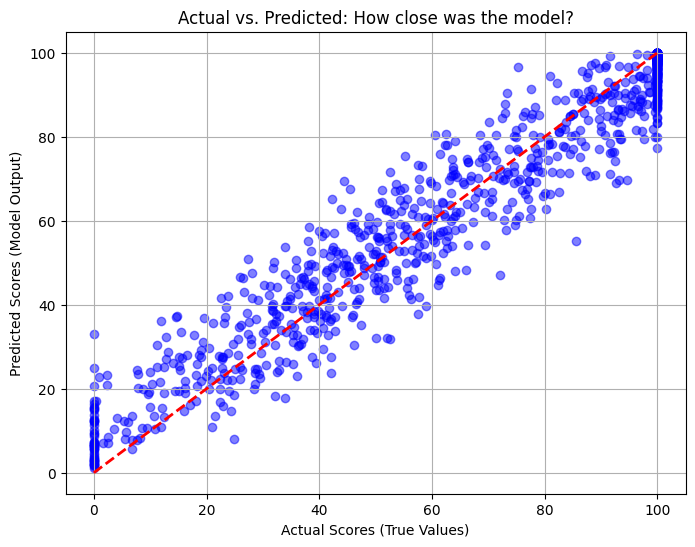

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue')
plt.plot([0, 100], [0, 100], color='red', linestyle='--', linewidth=2) 
plt.xlabel('Actual Scores (True Values)')
plt.ylabel('Predicted Scores (Model Output)')
plt.title('Actual vs. Predicted: How close was the model?')
plt.grid(True)
plt.show()

# 8-Residual Plot

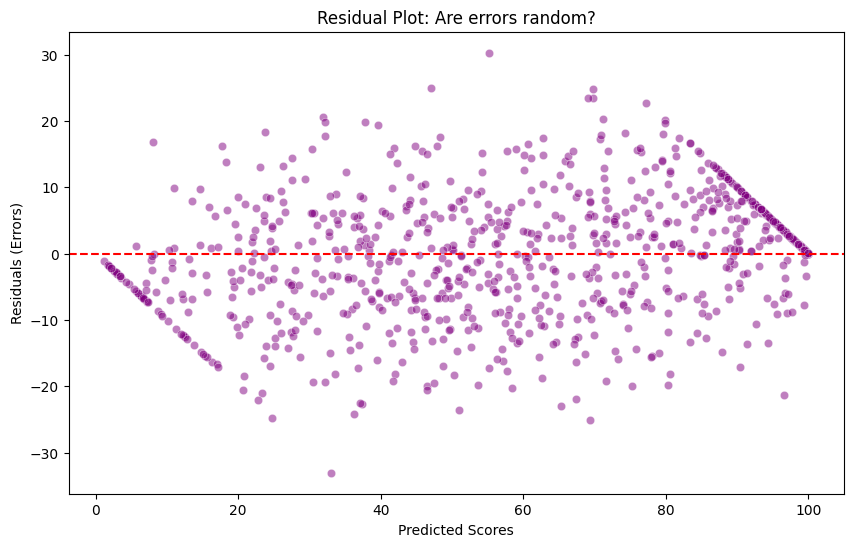

In [9]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf, y=residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Scores')
plt.ylabel('Residuals (Errors)')
plt.title('Residual Plot: Are errors random?')
plt.show()

# 9-Pairplot with Hue

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

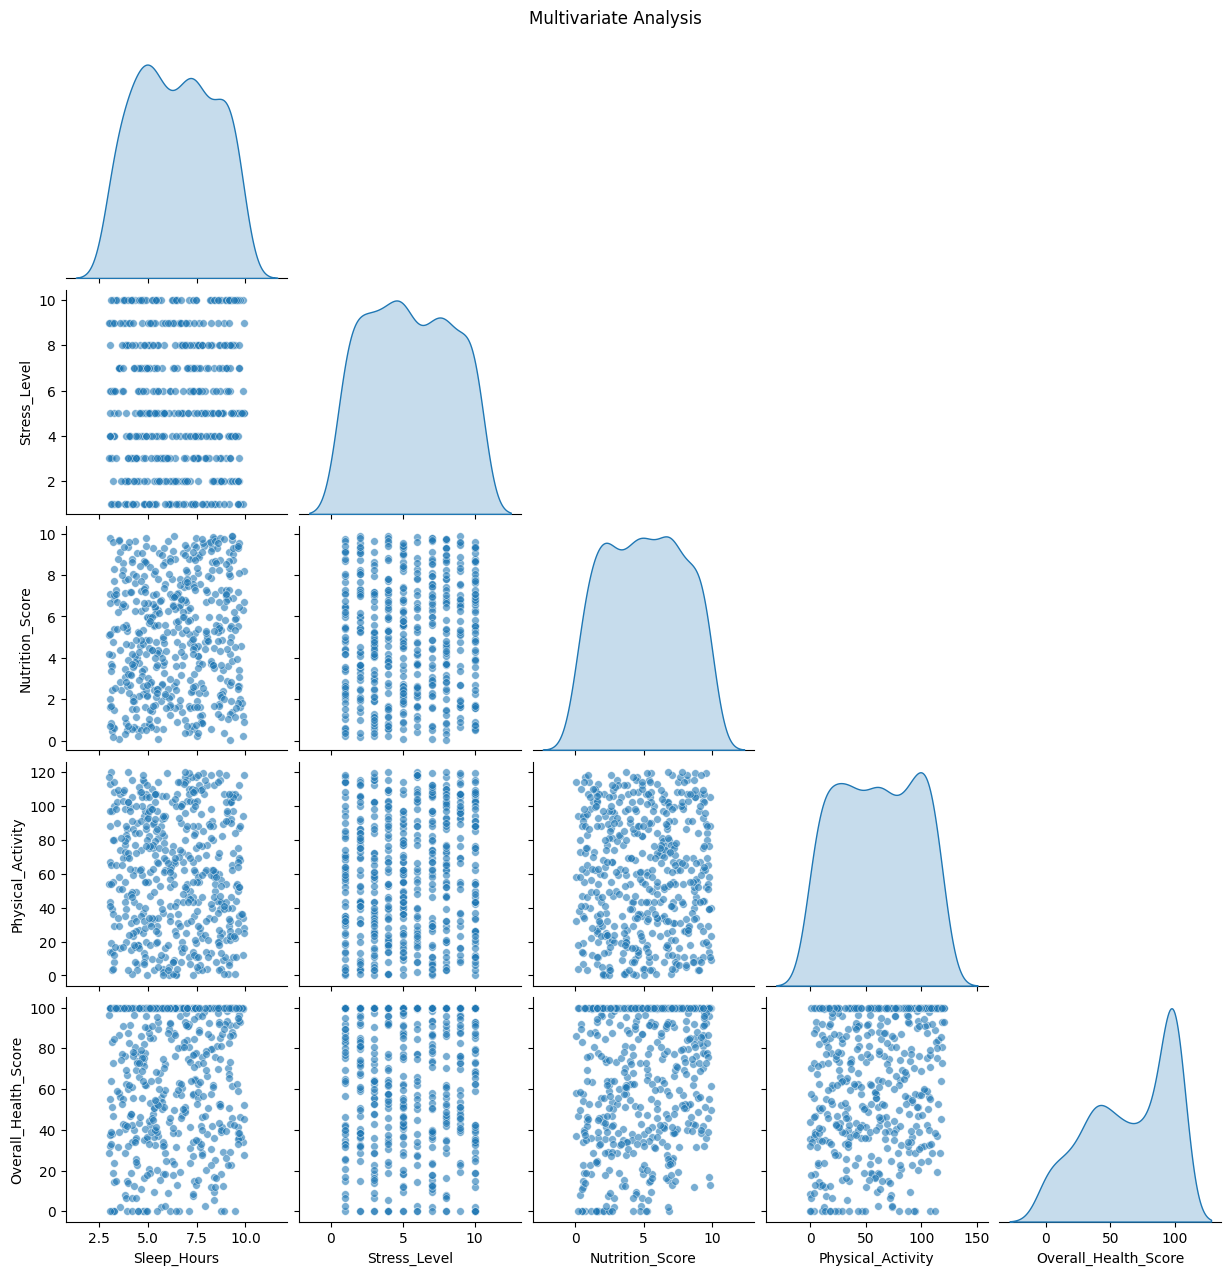

In [10]:
sample_df = df.sample(500, random_state=42)

subset_cols = ['Sleep_Hours', 'Stress_Level', 'Nutrition_Score', 'Physical_Activity', 'Overall_Health_Score']

sns.pairplot(sample_df[subset_cols], 
             diag_kind='kde',
             plot_kws={'alpha': 0.6, 's': 30},
             corner=True) 
plt.suptitle('Multivariate Analysis', y=1.02)
plt.show()

# 10-Box Plot (Classifications)

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


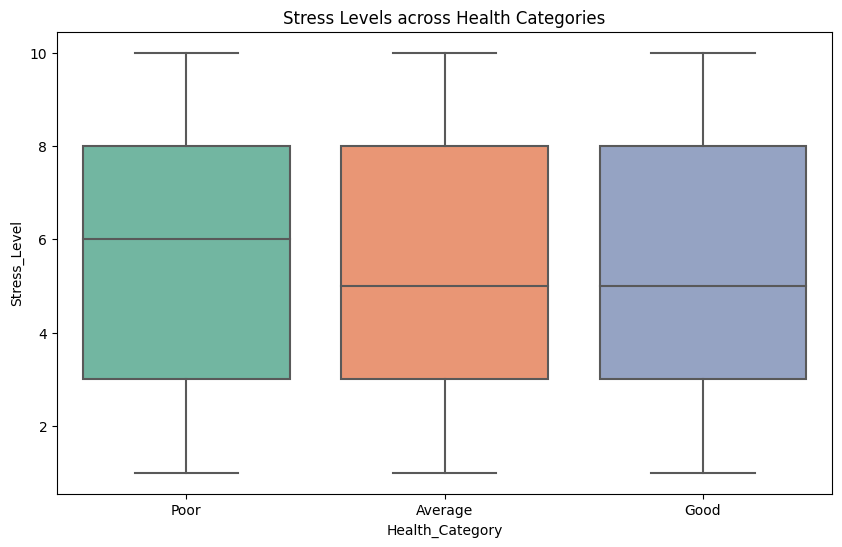

In [11]:
df['Health_Category'] = pd.cut(df['Overall_Health_Score'], 
                               bins=[0, 50, 80, 100], 
                               labels=['Poor', 'Average', 'Good'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Health_Category', y='Stress_Level', data=df, palette='Set2')
plt.title('Stress Levels across Health Categories')
plt.show()

# [Shenouda Safwat](https://www.linkedin.com/in/shenouda-safwat/)